In [2]:
#@title Install dependencies
from google.colab import files
!pip install -q HTS-doseresponse
from HTS_doseresponse import *

In [3]:
#@title Use example data or upload CSV results file
# @markdown Leave unchecked for upload prompt
use_example_data = True #@param {type:"boolean"}
if use_example_data == True:
  input_filename = "example_data.csv"
  df = pd.read_csv(fetch_example_data(input_filename), index_col='sample_name')
else:
  csv_file = files.upload()
  input_filename = str(list(csv_file.keys())[0])
  df = pd.read_csv(io.BytesIO(csv_file[input_filename]),index_col='sample_name')


In [4]:
#@title Preview uploaded file
df

,conc_nM,response
sample_name,,
Sample_00,1000000.00,0.015739
Sample_00,100000.00,0.019311
Sample_00,10000.00,0.005212
Sample_00,1000.00,0.083559
Sample_00,100.00,0.520454
...,...,...
Sample_95,100.00,0.487863
Sample_95,10.00,0.902213
Sample_95,1.00,0.975591


In [5]:
# @title Process data
df = process_doseresponse_df(df)

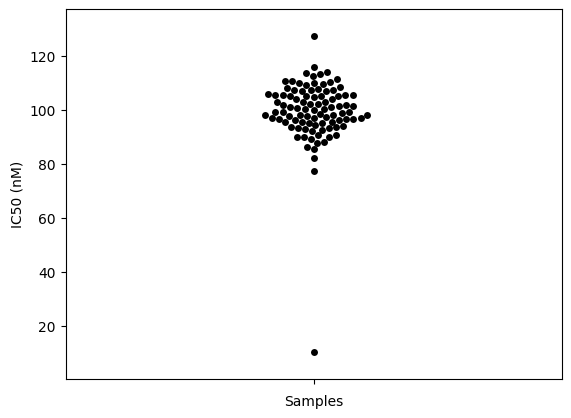

In [6]:
# @title Swarm plot of results
f = swarmplot_IC50results(df)

In [7]:
# @title Process file for output into a results schema
# @markdown Download starts automatically - if there are issues check ad-blocker
df = results_schema_output(df)
output_filename = out_filename(input_filename)
df.to_csv(output_filename)
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>